In [2]:
'''
ПРИКЛАД 1
'''

import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

In [3]:
rv_bernoulli = stats.bernoulli(p=0.3)

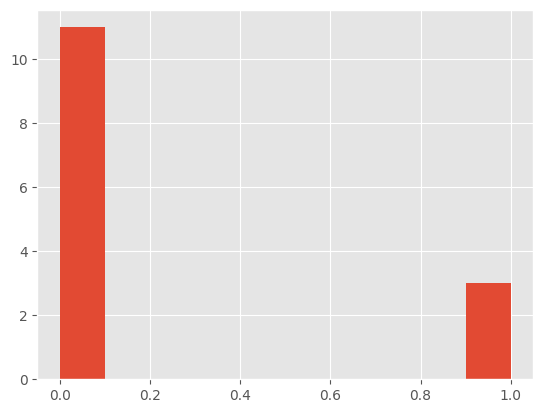

In [4]:
rv_bernoulli.rvs(14)
plt.hist(rv_bernoulli.rvs(14),bins=10)
plt.show()

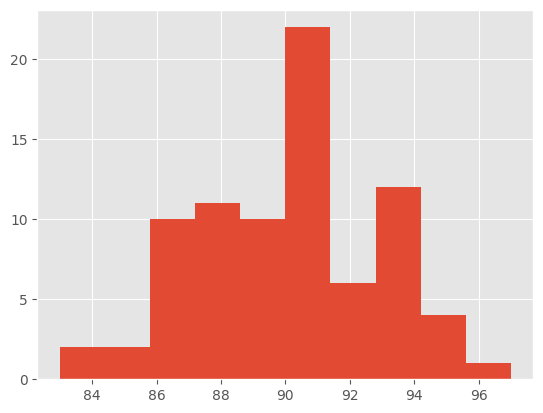

In [5]:
rv_binom = stats.binom(100, p=0.9)
rv_binom.rvs(8)
plt.hist(rv_binom.rvs(80),bins=10)
plt.show()

In [6]:
a = 5
b = 10
rv_uniform = stats.uniform(a, b - a)
rv_uniform.cdf(5.5)

0.1

In [7]:
rv_uniform.pdf(7)

0.2

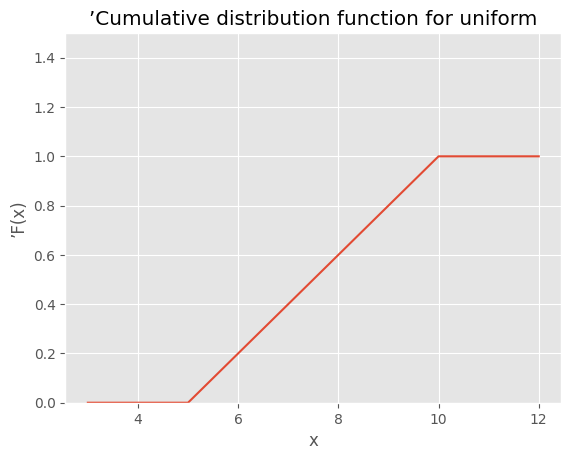

In [8]:
X = np.linspace(a - 2, b + 2, 100) 
cdf = rv_uniform.cdf(X)
plt.plot(X, cdf)
plt.ylabel('’F(x)')
plt.xlabel('x')
plt.ylim([0,1.5])
plt.title('’Cumulative distribution function for uniform') 
plt.show()

Text(0.5, 1.0, 'PDF for uniform')

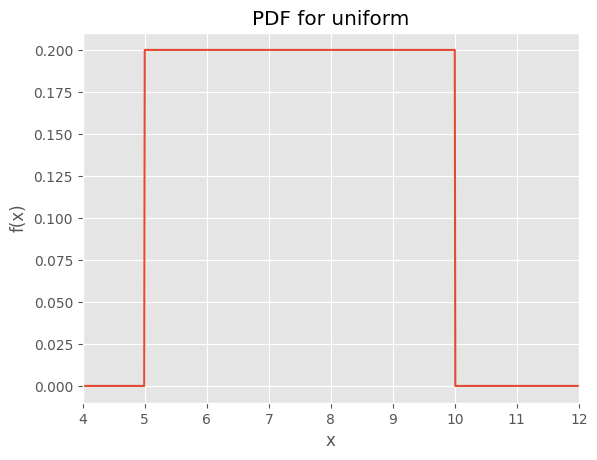

In [9]:
X = np.linspace(a-2 , b + 2, 1000) 
pdf = rv_uniform.pdf(X) 
plt.plot(X, pdf)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim([4, 12])
plt.title('PDF for uniform')

In [40]:
mu = 2
sigma = 0.5
rv_norm = stats.norm(loc=mu, scale=sigma)
rv_norm.rvs(17)

array([1.73185393, 1.46086349, 2.27350639, 3.03305923, 2.27819642,
       0.84823495, 2.1276065 , 1.66650266, 2.99292327, 3.0218357 ,
       1.42846489, 2.99148122, 1.8705166 , 3.36493852, 1.47904572,
       1.79728328, 1.54774133])

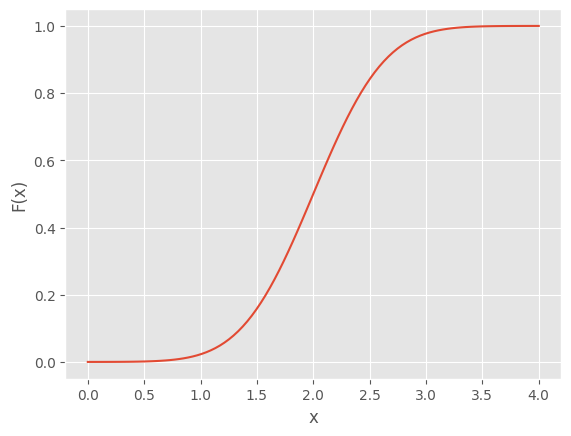

In [59]:
x = np.linspace(0, 4, 100) 
cdf = rv_norm.cdf(x) 
plt.plot(x, cdf) 
plt.ylabel('F(x)')
plt.xlabel('x')
plt.show()

Text(0.5, 0, 'x')

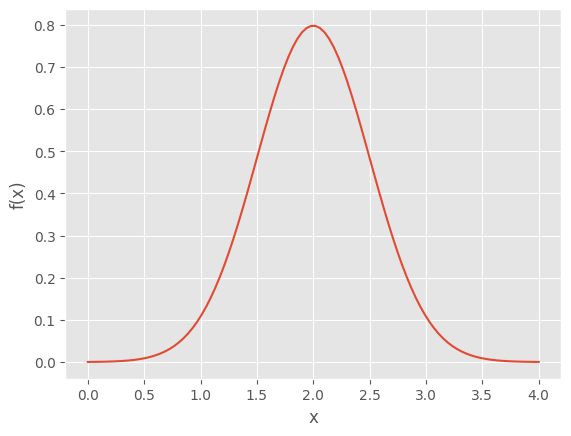

In [60]:
x = np.linspace(0,4,100) 
pdf = rv_norm.pdf(x)
plt.plot(x, pdf) 
plt.ylabel('f(x)')
plt.xlabel('x')

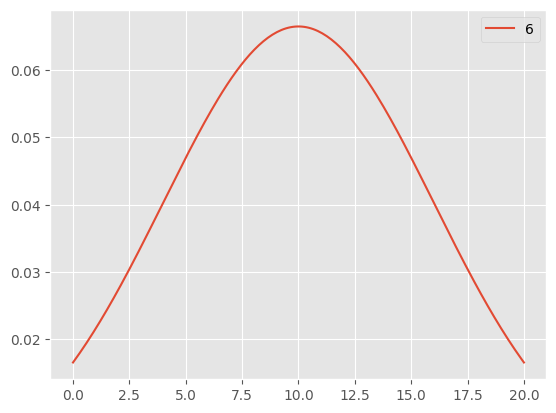

In [61]:
means = [1,5,10]
mu = 10
sigmas = [1, 2, 4, 6]
for sigma in sigmas:
    rv_norm = stats.norm(loc=mu, scale=sigma) 
x = np.linspace(0,20,200)
cdf = rv_norm.pdf(x)
plt.plot(x, cdf, label=sigma)
plt.legend()

In [65]:
mean, var, skew = rv_norm.stats(moments='mvs') 
print(mean, var, skew)

10.0 36.0 0.0


In [ ]:
'''
ПРИКЛАД 2
'''

In [18]:
from scipy import stats
population = stats.norm.rvs(loc=2, scale=5, size=100000)

In [19]:
import numpy as np 
sample_size = 100
sample = np.random.choice(a = population, size = sample_size)

In [20]:
sample_mean = sample.mean()
st_dev = population.std()

In [21]:
z_value = stats.norm.ppf(q = 0.975)
print('z-value:right', z_value)

z-value:right 1.959963984540054


In [22]:
z_value = stats.norm.ppf(q = 0.025)
print("z-value:left", z_value)

z-value:left -1.9599639845400545


In [23]:
interval = z_value * (st_dev/np.sqrt(sample_size))
conf_inv = (sample_mean - interval, sample_mean + interval)
print("Confidence interval:", conf_inv)

Confidence interval: (2.4893564294536947, 0.5413615513905817)


In [24]:
def compute_ci(sample, st_dev):
    z_value = stats.norm.ppf(q = 0.975)
    sample_size = len(sample)
    interval = z_value * (st_dev/np.sqrt(sample_size))
    conf_inv = (sample_mean - interval, sample_mean + interval)
    return conf_inv


In [25]:
np.random.seed(5) 
sample_size = 2000
sample = np.random.choice(a = population, size = sample_size) 
ci = compute_ci(sample, st_dev)
print("conf interval for 2000 sample size:", ci)

conf interval for 2000 sample size: (1.2975665420636115, 1.733151438780665)


In [26]:
def compute_ci_t(sample, alpha=0.95):
    n = sample.shape[0]
    mu, se = np.mean(sample), stats.sem(sample) 
    bound = se * stats.t.ppf((1 + alpha) / 2., n-1)
    return mu - bound, mu + bound

sample = np.random.choice(a = population, size = 30)
ci_t = compute_ci_t(sample, alpha=0.95)
print("conf interval with t test for 2000 sample size:", ci_t)

conf interval with t test for 2000 sample size: (-0.4302144974670328, 2.5652012050217445)


In [27]:
import pandas as pd 
import numpy as np
taxi_mex = pd.read_csv('taxi-route/mex_clean.csv')

def generate_distribution_sample(data, sample_size, dist_size): 
    sample_means = []
    for i in range(dist_size):
        sample = np.random.choice(a = data, size = sample_size) 
        sample_means.append(np.mean(sample))
    return sample_means

sample_size = 10000
dist_size = 50000
sample_means = generate_distribution_sample(taxi_mex['dist_meters']/1000, sample_size, dist_size)

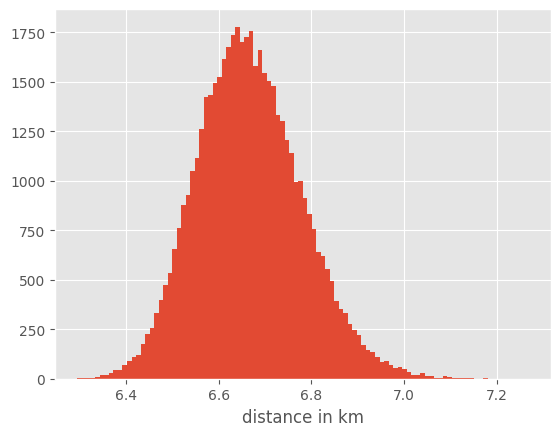

In [75]:
import matplotlib.pyplot as plt 
plt.hist(sample_means, bins=100) 
plt.xlabel('distance in km') 
plt.show()

In [67]:
np.sort(sample_means)
lb = np.percentile(sample_means, 2.5)
ub = np.percentile(sample_means, 97.5)
print("conf interval for bootstrap:", (lb, ub))

conf interval for bootstrap: (6.461480464999999, 6.9035547875)


In [ ]:
'''
ПРИКЛАД 3
'''

In [30]:
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline
taxi_bog = pd.read_csv('taxi-route/bog_clean.csv') 
taxi_mex = pd.read_csv('taxi-route/mex_clean.csv')

In [31]:
sample = taxi_mex['wait_sec'].sample(n=3000)/60 
print(stats.ttest_1samp(sample, 10))

TtestResult(statistic=1.0022282471555195, pvalue=0.31631422474408966, df=2999)


In [32]:
taxi_mex['pickup_datetime'] = pd.to_datetime(taxi_mex.pickup_datetime) 
taxi_mex['month'] = taxi_mex['pickup_datetime'].dt.month 
taxi_bog.shape
taxi_mex.shape

(12694, 13)

In [33]:
print(stats.ttest_ind(taxi_mex['trip_duration'].sample(n=3000), 
                      taxi_bog['trip_duration'].sample(n=3000)))

TtestResult(statistic=-5.052866573702593, pvalue=4.481172702152563e-07, df=5998.0)


In [34]:
print(stats.ttest_ind(taxi_mex['wait_sec'].sample(n=3000), 
                      taxi_bog['wait_sec'].sample(n=3000)))

TtestResult(statistic=1.0011536593275312, pvalue=0.31679291307279933, df=5998.0)


In [35]:
control=taxi_mex[taxi_mex.month == 11]['trip_duration'].sample(n=1000)
treatment = taxi_mex[taxi_mex.month == 12]['trip_duration'].sample(n=1000)
print(stats.ttest_rel(control, treatment))


TtestResult(statistic=-0.8208353440547521, pvalue=0.4119358873397937, df=999)
